# Global Disaster Response Analysis (2018–2024)

<img src="Naturaldisasters.jpg" 
        alt="Natural Disaster" 
        width="800" 
        height="600" 
        style="display: block; margin: 0 auto" />

#### **by Gavela Maculuve and Dayyan Fundi**

## Dataset Summary

The dataset contains 50,000 records and 12 columns (of global disaster events). It provides valuable insight into the scale and consequences of disasters worldwide between 2018 and 2024, as well as how nations and organizations respond.

Link: [Global Disaster Dataset](https://www.kaggle.com/datasets/zubairdhuddi/global-daset)

Dataset Columns include:  
- *date*  
- *country*  
- *disaster_type*  
- *severity_index*  
- *casualties*  
- *economic_loss_usd*  
- *response_time_hours*  
- *aid_amount_usd*
- *response_efficiency_score*
- *recovery_days*
- *longitude*
- *latitude*

### Research Question
- ***How can machine learning models be utilized to forecast immediate operational risks (efficiency) and quantify the determinants of long-term disaster impacts (economic loss, recovery duration, and severity)***

### Goals
- <span style="color:yellow;">Early-warning Model development</span>
- <span style="color:green;">Severity classification</span>
- <span style="color:blue;">Quantifying factors influencing recovery time</span>
- <span style="color:red;">Analyzing the key drivers of economic loss</span>
- <span style="color:violet;">Geospatial clustering of disasters</span>

---

## Importing

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### Importing Dataset

In [2]:
data = pd.read_csv('/Users/Gavela Maculuve/PycharmProjects/CSCI 250/data/global_disaster_response_2018_2024.csv')
data.head(10)

date        country disaster_type  severity_index  casualties  \
0  2021-01-31         Brazil    Earthquake            5.99         111   
1  2018-12-23         Brazil  Extreme Heat            6.53         100   
2  2020-08-10          India     Hurricane            1.55          22   
3  2022-09-15      Indonesia  Extreme Heat            4.55          94   
4  2022-09-28  United States      Wildfire            3.80          64   
5  2019-01-15         France         Flood            2.56          56   
6  2020-12-19        Germany   Storm Surge            4.77          81   
7  2022-03-31         Greece         Flood            1.47          34   
8  2024-06-22          Spain       Drought            3.32          56   
9  2018-11-23         Mexico       Tornado            2.61          73   

   economic_loss_usd  response_time_hours  aid_amount_usd  \
0         7934365.71                15.62       271603.79   
1         8307648.99                 5.03       265873.81   
2          765136.99                32.54        49356.49   
3         1308251.31                 7.83       237512.88   
4         2655864.36                21.90       188910.69   
5           51588.22                12.12       137988.29   
6         1243386.99                 6.47       194502.18   
7         1190129.51                29.18        91727.22   
8         3871721.46                19.33       134246.08   
9         4375843.52                18.05       182715.32   

   response_efficiency_score  recovery_days  latitude  longitude  
0                      83.21             67   -30.613   -122.557  
1                      96.18             55    10.859   -159.194  
2                      60.40             22     0.643   -160.978  
3                      86.41             47   -33.547     30.350  
4                      72.81             42   -19.170   -117.137  
5                      91.57             26   -14.409    -47.947  
6                      98.82             49    36.855     78.109  
7                      75.97             19   -50.544    -70.319  
8                      79.74             27   -36.925   -146.351  
9                      83.76             22    42.638    124.604

## Exploratory Data Analysis

In [3]:
# Provides a summary of the main statistical properties of all numeric columns in our dataset
data.describe()

severity_index    casualties  economic_loss_usd  response_time_hours  \
count    50000.000000  50000.000000       5.000000e+04         50000.000000   
mean         5.015769    100.591140       5.068593e+06            12.183027   
std          1.942843     65.052064       3.268541e+06             9.259081   
min          1.000000      0.000000       5.273900e+02             1.000000   
25%          3.660000     51.000000       2.585513e+06             6.270000   
50%          4.990000     91.000000       4.548351e+06            10.510000   
75%          6.340000    138.000000       6.950615e+06            15.450000   
max         10.000000    524.000000       2.445624e+07            63.100000   

       aid_amount_usd  response_efficiency_score  recovery_days      latitude  \
count    5.000000e+04               50000.000000   50000.000000  50000.000000   
mean     2.500003e+05                  87.574025      49.682560      0.231205   
std      1.432275e+05                  10.188961      20.098944     34.759662   
min      1.660000e+01                  29.750000       2.000000    -59.994000   
25%      1.429663e+05                  83.060000      36.000000    -29.848250   
50%      2.305365e+05                  89.180000      49.000000      0.267500   
75%      3.352259e+05                  94.700000      63.000000     30.488250   
max      1.126465e+06                 100.000000     112.000000     59.997000   

          longitude  
count  50000.000000  
mean       0.089889  
std       98.380208  
min     -169.998000  
25%      -85.551750  
50%        0.390500  
75%       85.665000  
max      169.999000

In [4]:
# checking data types and missing values (NaNs) after the update
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
# All unique values for the country columns
data['country'].unique()

array(['Brazil', 'India', 'Indonesia', 'United States', 'France',
       'Germany', 'Greece', 'Spain', 'Mexico', 'South Africa',
       'Philippines', 'Nigeria', 'Japan', 'Canada', 'Italy', 'Australia',
       'China', 'Bangladesh', 'Chile', 'Turkey'], dtype=object)

In [6]:
# same here but for disaster_types
data['disaster_type'].unique()

array(['Earthquake', 'Extreme Heat', 'Hurricane', 'Wildfire', 'Flood',
       'Storm Surge', 'Drought', 'Tornado', 'Landslide',
       'Volcanic Eruption'], dtype=object)

In [7]:
# Converting date column to a real datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=False)

# Extracting the year, month, quarter and day of the week
data['year']  = data['date'].dt.year
data['month'] = data['date'].dt.month
data['quarter'] = data['date'].dt.quarter
data['dayofweek'] = data['date'].dt.day_name()

In [8]:
# checking for NaNs
data.isna().sum().sort_values(ascending=False)

date                         0
country                      0
disaster_type                0
severity_index               0
casualties                   0
economic_loss_usd            0
response_time_hours          0
aid_amount_usd               0
response_efficiency_score    0
recovery_days                0
latitude                     0
longitude                    0
year                         0
month                        0
quarter                      0
dayofweek                    0
dtype: int64

### Visualing our Data

##### Mode Bar Graph 

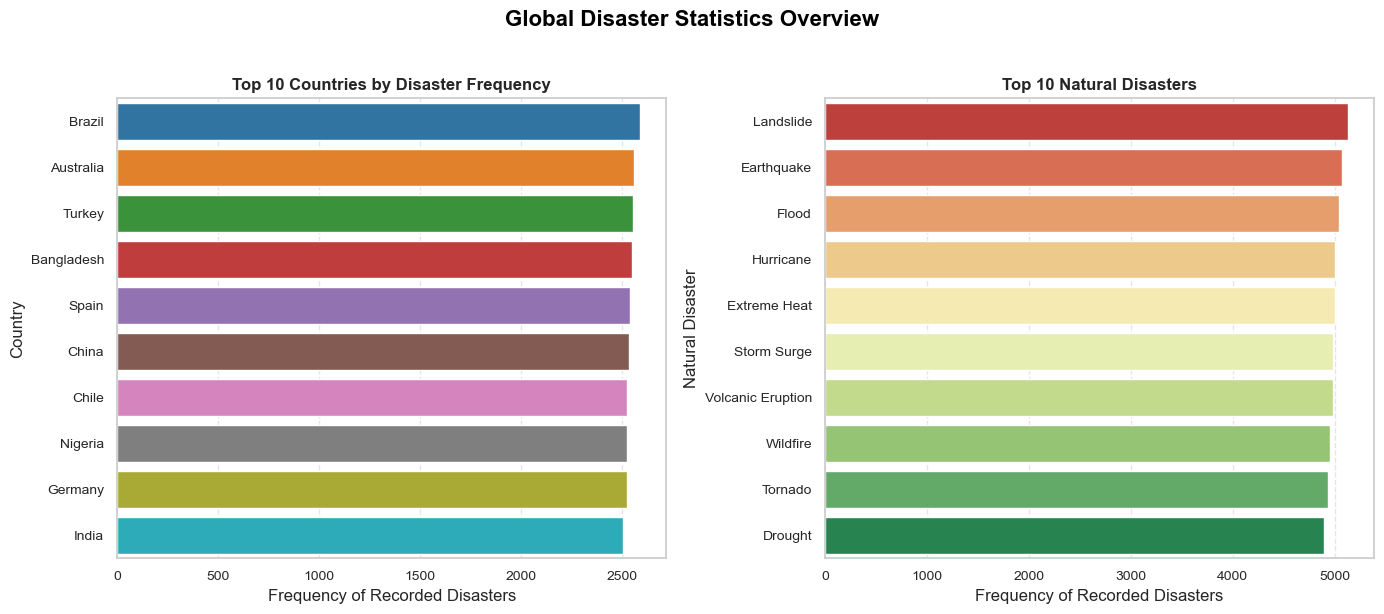

In [9]:
plt.figure(figsize=(14,6))
sb.set_theme(style="whitegrid")

# Top 10 Countries by Disaster Frequency
plt.subplot(1,2,1)
country_counts = data['country'].value_counts().head(10)
sb.barplot(
    x=country_counts.values,
    y=country_counts.index,
    hue = country_counts.index,
    palette='tab10'
)
plt.title('Top 10 Countries by Disaster Frequency', fontweight='bold')
plt.xlabel('Frequency of Recorded Disasters')
plt.ylabel('Country')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Top 10 Natural Disasters
plt.subplot(1,2,2)
disaster_counts = data['disaster_type'].value_counts()
sb.barplot(
    x=disaster_counts.values,
    y=disaster_counts.index,
    hue = disaster_counts.index,
    palette='RdYlGn'
)
plt.title('Top 10 Natural Disasters', fontweight='bold')
plt.xlabel('Frequency of Recorded Disasters')
plt.ylabel('Natural Disaster')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle('Global Disaster Statistics Overview', fontsize=16, fontweight='bold', color='black', y=1.02)
plt.tight_layout()
plt.show()

##### Casuality Distribution

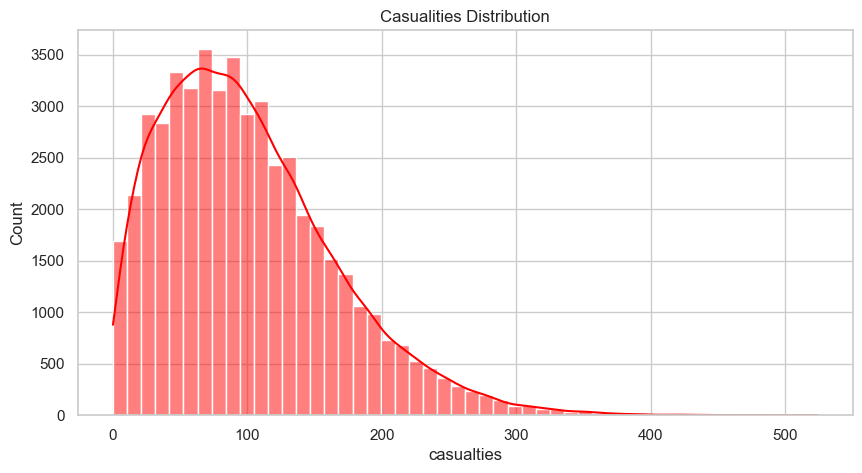

In [10]:
plt.figure(figsize=(10,5))
sb.histplot(data['casualties'], bins = 50, color='red', kde=True)
plt.title("Casualities Distribution")
plt.show()

- ***Majority of the disasters result in a lower number of casualities.***

##### More Distributions and Boxplots

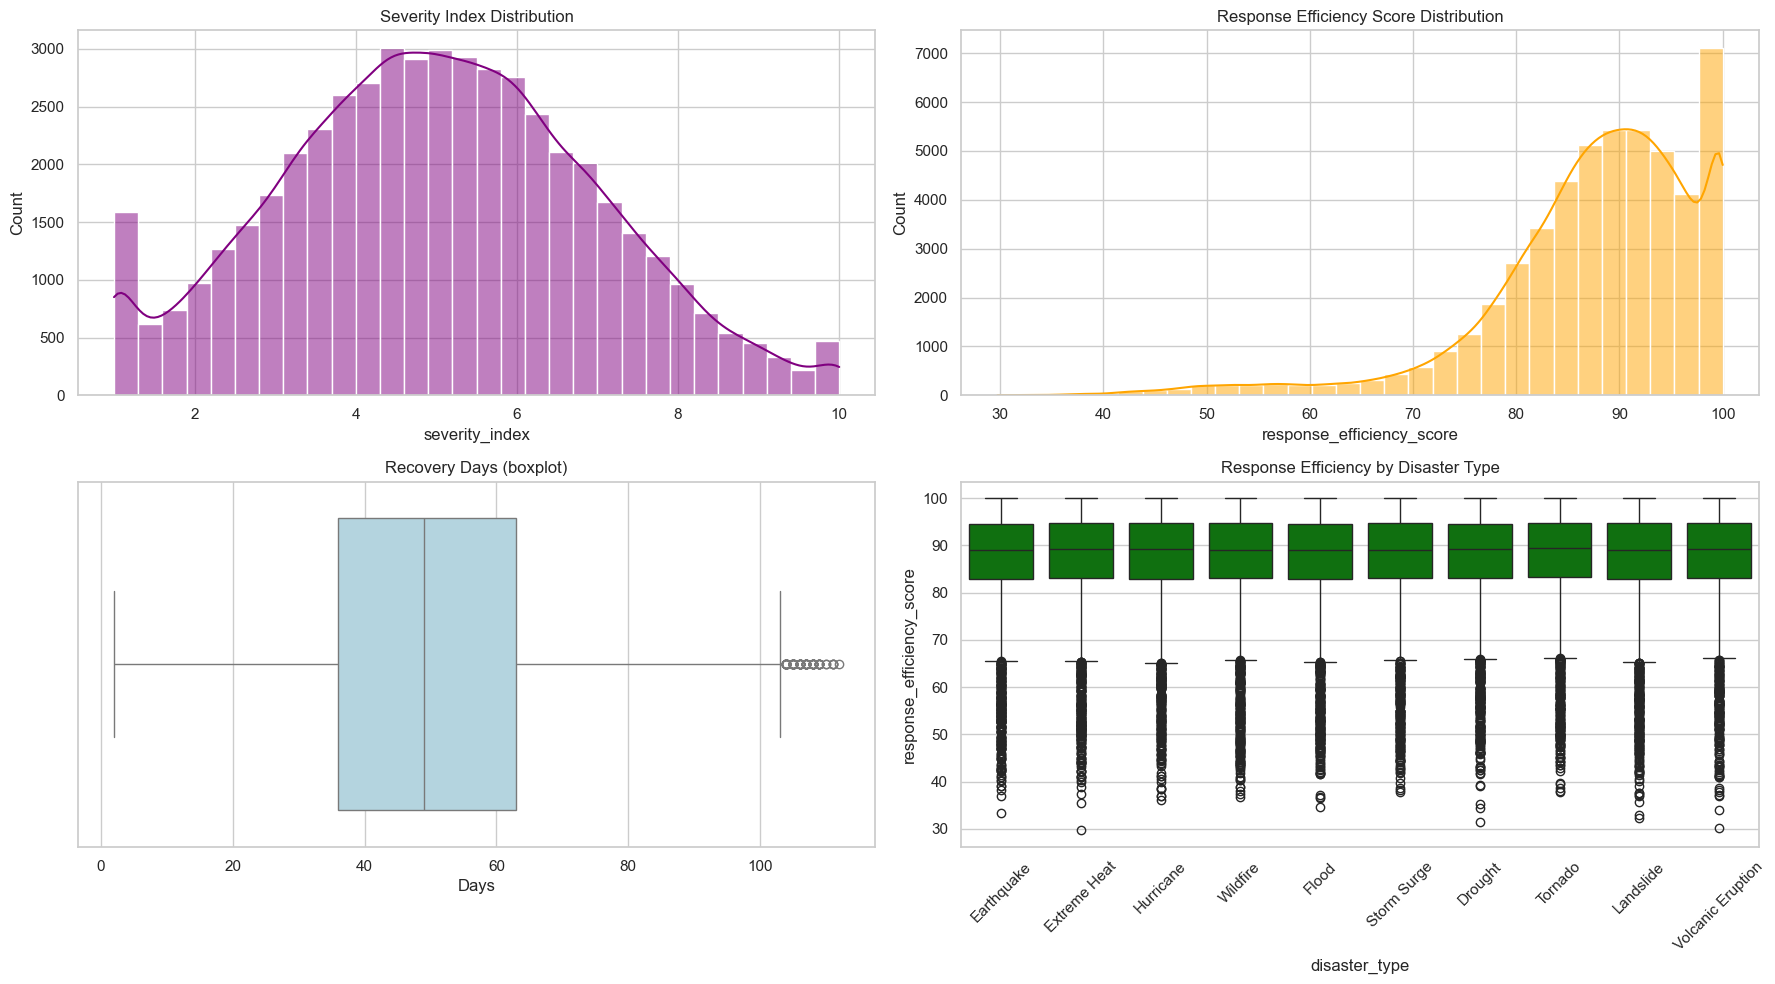

In [11]:
plt.figure(figsize=(18,10))

# Severity Index
plt.subplot(2,2,1)
sb.histplot(data['severity_index'], kde=True, bins=30, color='purple')
plt.title('Severity Index Distribution')

# Response Efficiency
plt.subplot(2,2,2)
sb.histplot(data['response_efficiency_score'], kde=True, bins=30, color='orange')
plt.title('Response Efficiency Score Distribution')

# Recovery Days
plt.subplot(2,2,3)
sb.boxplot(x=data['recovery_days'], color='lightblue')
plt.title('Recovery Days (boxplot)')
plt.xlabel('Days')

# Efficiency by Disaster Types
plt.subplot(2,2,4)
sb.boxplot(x='disaster_type', y='response_efficiency_score', data=data, color='green')
plt.xticks(rotation=45)
plt.title("Response Efficiency by Disaster Type")

plt.tight_layout()
plt.show()

- Severity Index looks fairly normally distributed, peaking around a severity of 5 (mean).
- Response Efficiency is left-skewed, showing that most responses are rated highly.
- The boxplot of Recovery days shows a median recovery time of around 50 days, with a wide spread
- Lastly, the Response Efficiency score for each Disaster Type seems fairly identical across all of them. This may suggest that the disaster type does not affect how effectively teams respond.

##### Correlation Heatmap

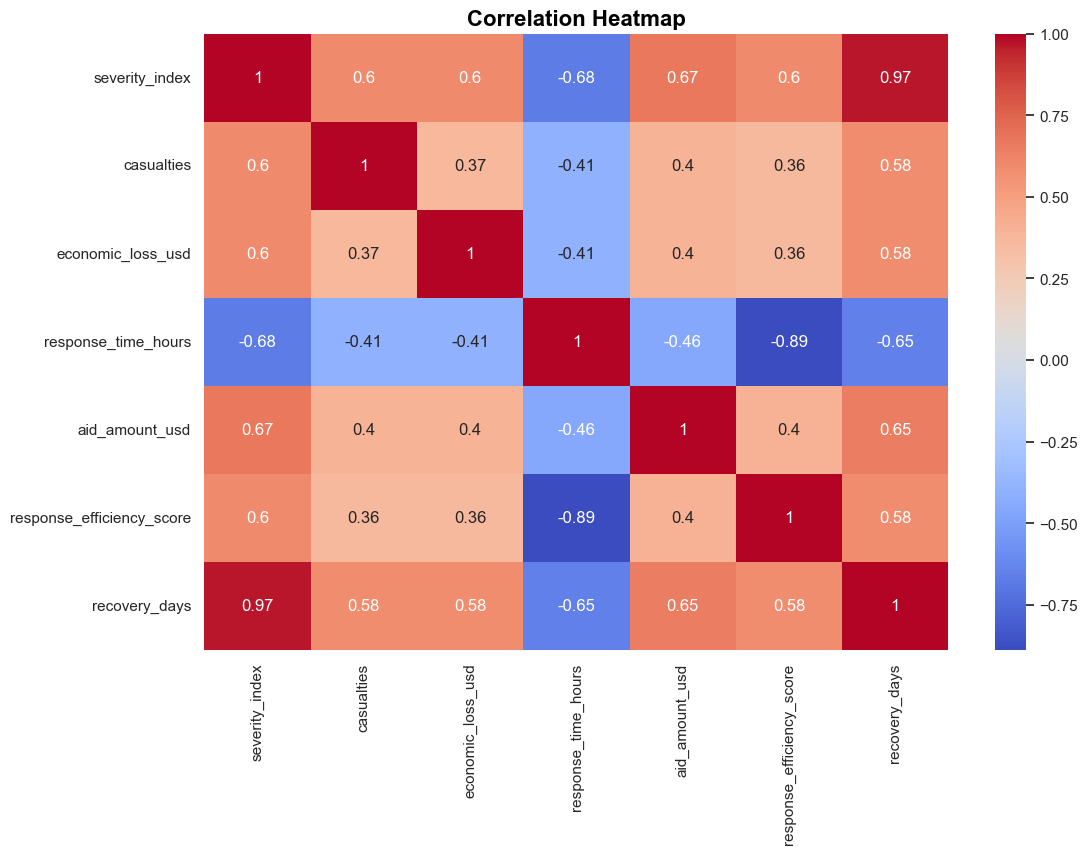

In [12]:
drop_list = ['latitude', 'longitude', 'year', 'month', 'quarter']
corr_matrix = data.drop(columns = drop_list, errors = 'ignore').corr(numeric_only=True)

plt.figure(figsize=(12,8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')#, vmin=-1, vmax=1,)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold', color='black')
plt.show()

##### Key Findings:

- Recovery Days is almost entirely predicted by how severe the disaster is.
- Efficiency is largely defined by how fast the response is (faster response = higher score)
- As severity rises, so does economic loss and the aid amount provided (0.67).

##### Overview of key Variables

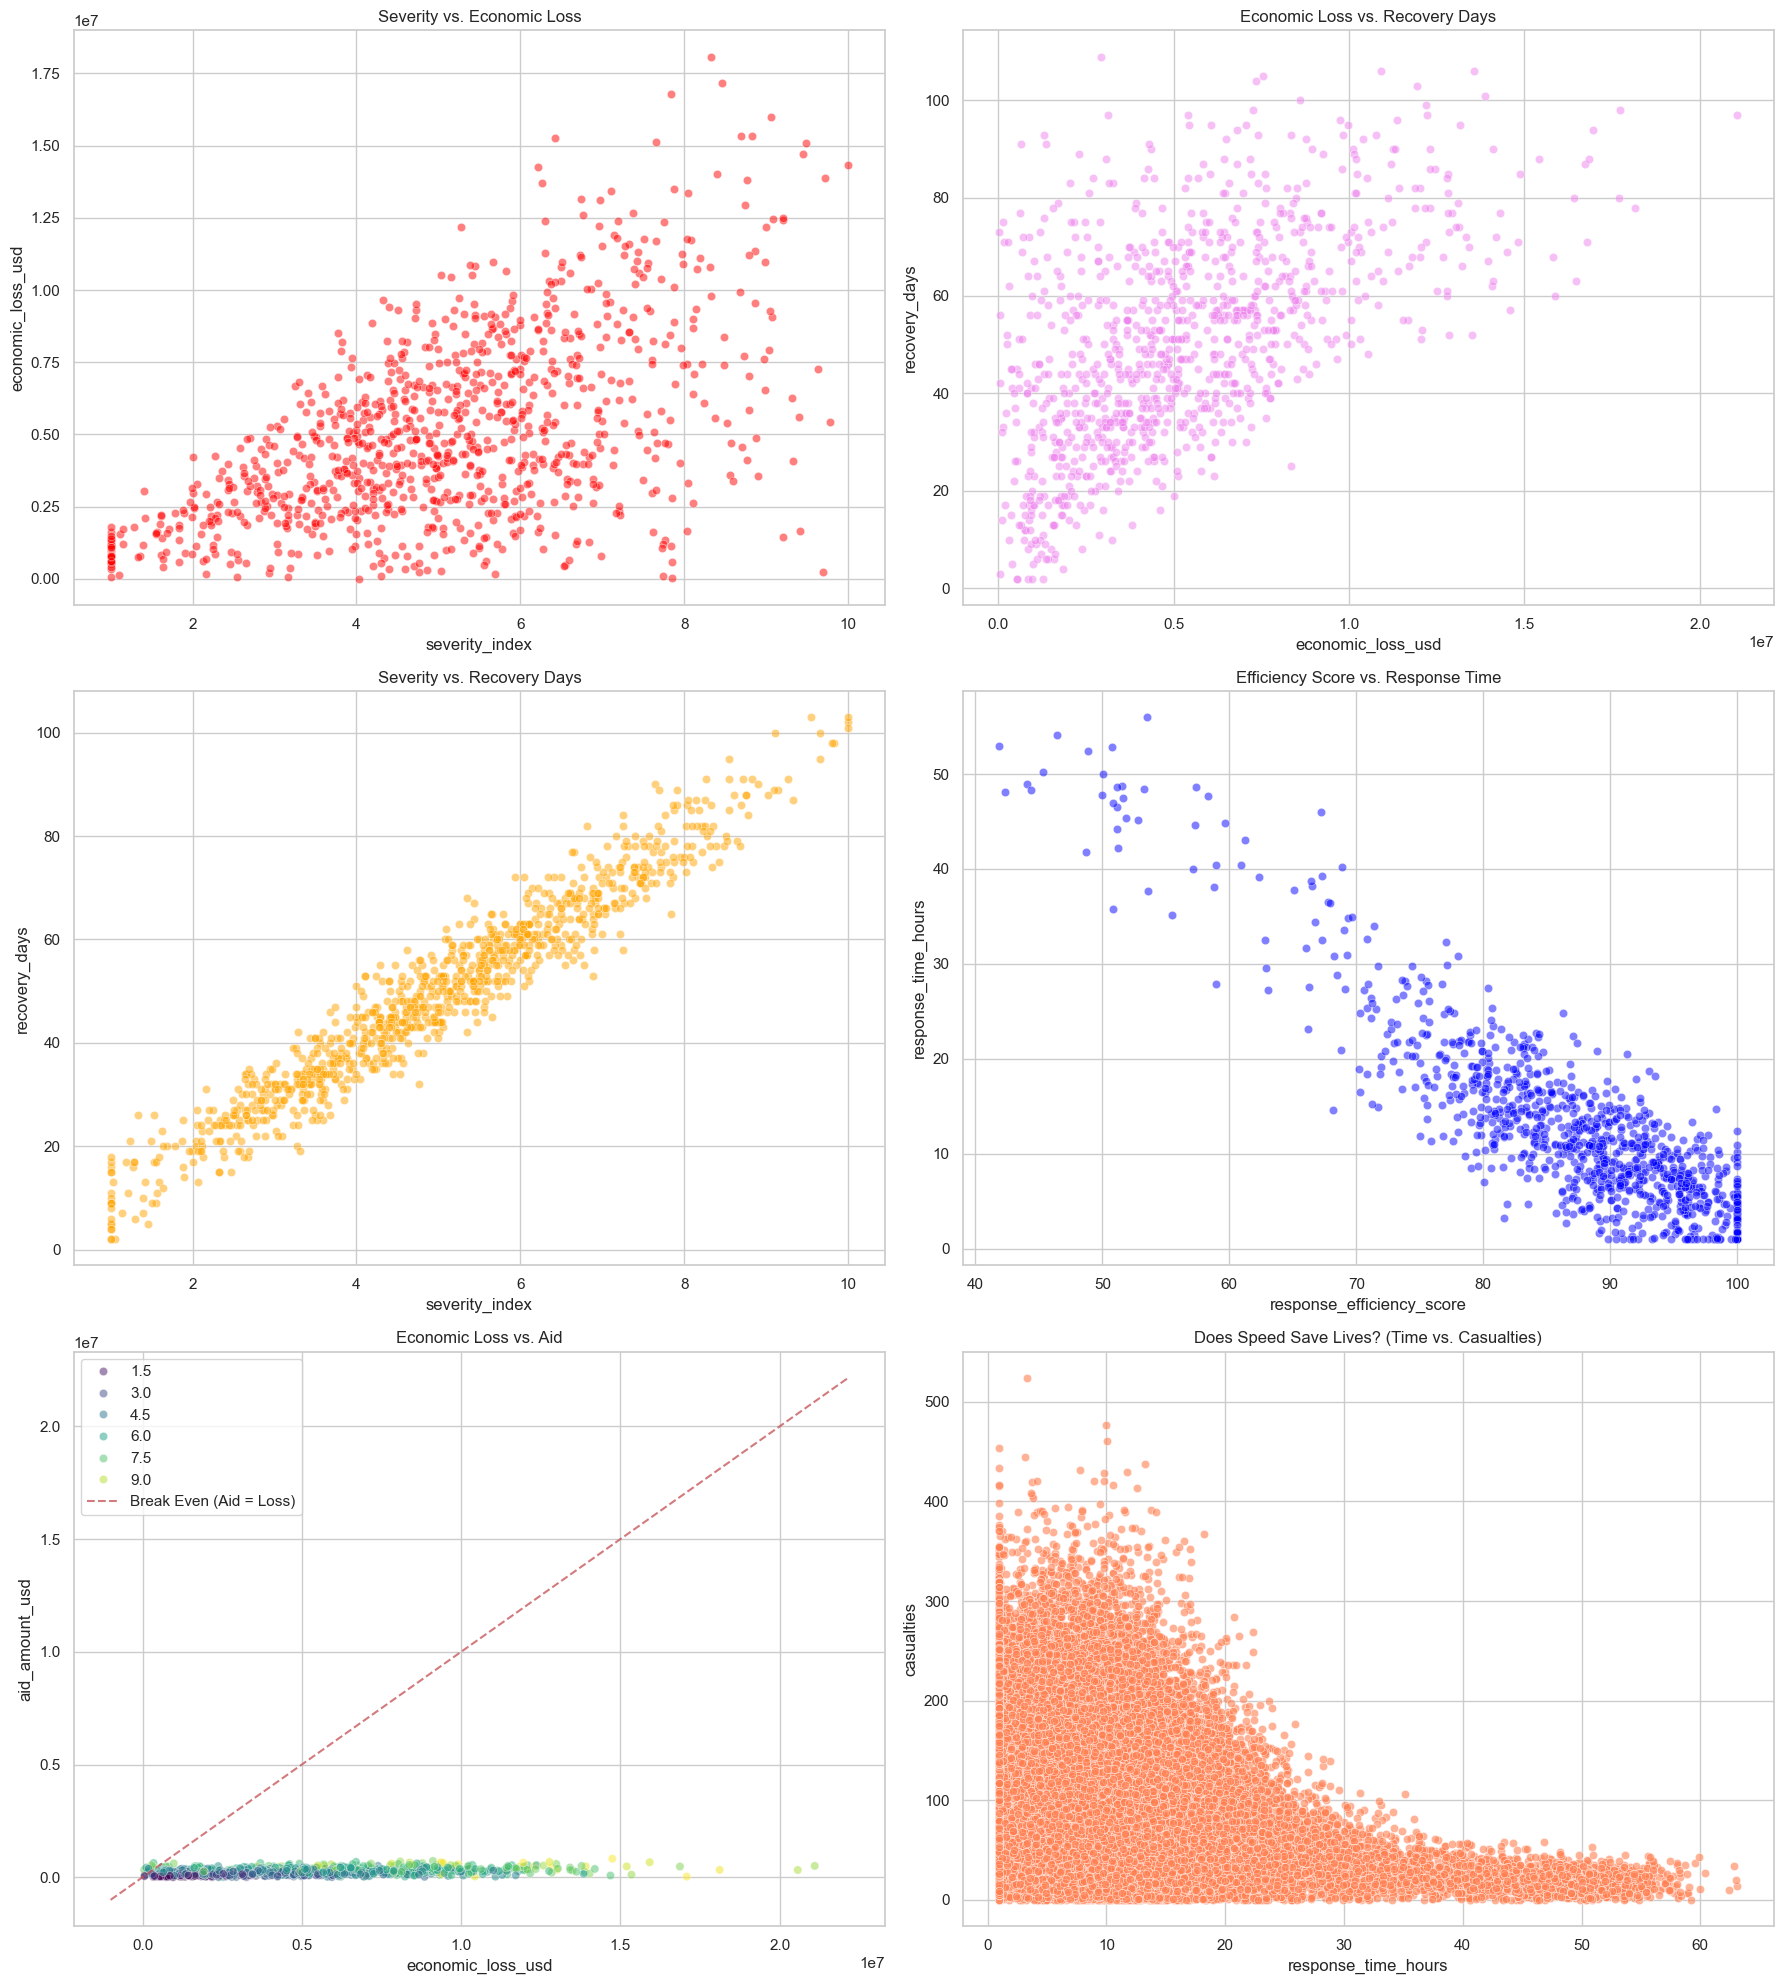

In [13]:
# (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Severity vs. Economic Loss
sb.scatterplot(data=data.sample(1000), x='severity_index', y='economic_loss_usd', 
               alpha=0.5, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Severity vs. Economic Loss')

# Economic Loss vs. Recovery Days
sb.scatterplot(data=data.sample(1000), x='economic_loss_usd', y='recovery_days', 
               alpha=0.5, color='violet', ax=axes[0, 1])
axes[0, 1].set_title('Economic Loss vs. Recovery Days')

# Severity vs. Recovery Days
sb.scatterplot(data=data.sample(1000), x='severity_index', y='recovery_days', 
               alpha=0.5, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Severity vs. Recovery Days')

# 4. Response Efficiency vs. Response Time
sb.scatterplot(data=data.sample(1000), x='response_efficiency_score', y='response_time_hours', 
               alpha=0.5, color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Efficiency Score vs. Response Time')

# The Aid Gap (Colored by Severity)
sb.scatterplot(data=data.sample(1000), x='economic_loss_usd', y='aid_amount_usd', 
               hue='severity_index', palette='viridis', alpha=0.5, ax=axes[2, 0])
# Break-Even Line
lims = [
    np.min([axes[2, 0].get_xlim(), axes[2, 0].get_ylim()]),
    np.max([axes[2, 0].get_xlim(), axes[2, 0].get_ylim()]),
]
axes[2, 0].plot(lims, lims, 'r--', alpha=0.75, label='Break Even (Aid = Loss)')
axes[2, 0].set_title('Economic Loss vs. Aid')
axes[2, 0].legend()

# Time vs Casualties
sb.scatterplot(data=data, x='response_time_hours', y='casualties', 
               alpha=0.6, color='coral', ax=axes[2, 1])
axes[2, 1].set_title('Does Speed Save Lives? (Time vs. Casualties)')

plt.tight_layout()
plt.show()

- (Severity vs. Recovery Days): The near-perfect correlation suggests that Recovered Days might be a calculated field rather than observed raw data.
- (Severity vs. Economic Loss): As disasters get more severe, the economic loss increases, but the variability of that loss also increases.
- (Response Time Hours vs Response Efficiency Score): As Efficiency Increases, Time Decreases
- (Aid Gap Analysis): Shows that Victims receive very little financial aid compared to their losses
- (Response Time vs. Casualties): Emergency Teams are correctly prioritizing the most dangerous event.

## ML Model Application

### Importing More Libraries

#### Supervised Learning Algorithms 

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

#### Unsupervised Learning Algorithms 

In [15]:
from sklearn.cluster import KMeans, MeanShift 
from sklearn.manifold import TSNE

In [16]:
import plotly.express as px
import folium

#### Data Preprocessing and Evalutation Metrics

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### "Early Warning" Classification Model.

In [18]:
data_2 = data.copy() # Creating an independent duplicate
threshold = data_2['response_efficiency_score'].quantile(0.75) # calculating the 75th percentile (Top 25%)
data_2['is_high_efficiency'] = (data_2['response_efficiency_score'] >= threshold).astype(float) # Target Column

In [19]:
features_eff = [
    'country', 
    'disaster_type', 
    'severity_index', 
    'latitude', 
    'longitude',
    'month' ] # x variables

# assigning our values to our dependent and independent variables
X = data_2[features_eff]
y = data_2['is_high_efficiency']

# converting the categorical data into numerical data
X = X.copy()
lb_ew_dis = LabelEncoder()
lb_ew_coun = LabelEncoder()
X.loc[:, "disaster_type"] = lb_ew_dis.fit_transform(X["disaster_type"])
X.loc[:, "country"] = lb_ew_coun.fit_transform(X["country"])

In [20]:
# splitting the data
X_train_ew, X_test_ew, y_train_ew, y_test_ew = train_test_split(X, y, test_size=0.25, random_state=11)
print(X_train_ew.shape, X_test_ew.shape, y_train_ew.shape, y_test_ew.shape)

# trainning the Model
rf_ew = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=11
)
rf_ew.fit(X_train_ew, y_train_ew)

(37500, 6) (12500, 6) (37500,) (12500,)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=11)

In [21]:
y_pred_ew = rf_ew.predict(X_test_ew) # Generating Predictions
ew_score = accuracy_score(y_test_ew, y_pred_ew) #calculating accuracy

print(f"Early Warning Model Accuracy: {ew_score:.4f}")
print(classification_report(y_test_ew, y_pred_ew))

Early Warning Model Accuracy: 0.6227
              precision    recall  f1-score   support

         0.0       0.87      0.58      0.70      9356
         1.0       0.37      0.74      0.50      3144

    accuracy                           0.62     12500
   macro avg       0.62      0.66      0.60     12500
weighted avg       0.75      0.62      0.65     12500



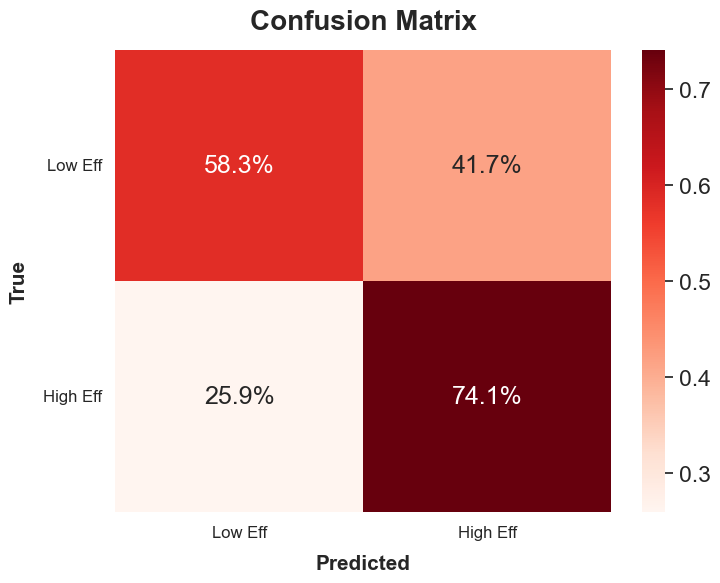

In [22]:
# Confusion Matrix
numClasses = 2
labels = ['Low Eff', 'High Eff']
conf = np.zeros([numClasses, numClasses])

# Get Predictions
guesses = y_pred_ew

for i in range(len(y_test_ew)):
    real = int(y_test_ew.iloc[i])
    guess = int(guesses[i])
    conf[real, guess] += 1

rowsums = np.sum(conf, 1, keepdims=True)
rowsums = np.reshape(rowsums, [numClasses, 1])
rowsums = np.repeat(rowsums, numClasses, axis=1)
conf = conf / rowsums  # This gives us the % (Recall)

# Creating DataFrame for Plotting
df_cm = pd.DataFrame(conf, 
                     index=[label for label in labels],
                     columns=[label for label in labels])

# Plotting
plt.figure(figsize=(8, 6))
sb.set(font_scale=1.5)  # Controls general font scale

sb.heatmap(df_cm, annot=True, cmap='Reds', fmt='.1%')

plt.title("Confusion Matrix", fontsize=20, weight='bold', pad=15)
plt.xlabel("Predicted", fontsize=15, weight='bold', labelpad=10)
plt.ylabel("True", fontsize=15, weight='bold', labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

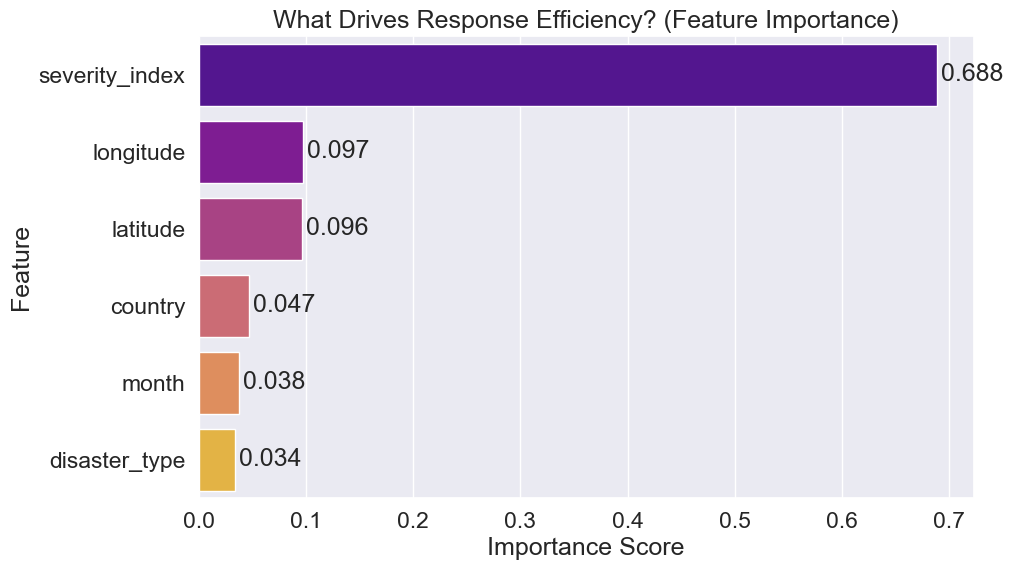

In [23]:
# This will show which variables are the most influential in deciding high Efficiency
feat_importances_ew = pd.DataFrame({
    'Feature': features_eff,
    'Importance': rf_ew.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sb.barplot(data=feat_importances_ew, x='Importance', y='Feature', hue='Feature', palette='plasma', legend = False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)
plt.title('What Drives Response Efficiency? (Feature Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Severity Classification

In [24]:
data_3 = data.copy() # Creating another independent duplicate

# Converting severity_index into three labels: Low, Medium, High
data_3['severity_category'] = pd.qcut(data_3['severity_index'], 
                                      q=3, 
                                      labels=['Low', 'Medium', 'High']) # Low, Medium, High
print("New Class Distribution (Balanced):")
print(data_3['severity_category'].value_counts())

drop_cols_severity = ['severity_index', 'severity_category', 'date',
                      'month', 'quarter', 'dayofweek', 'recovery_days', 
                      'response_time_hours', 'aid_amount_usd', 'response_efficiency_score']

New Class Distribution (Balanced):
severity_category
Low       16680
Medium    16678
High      16642
Name: count, dtype: int64


In [25]:
x_sev = data_3.drop(columns=[c for c in drop_cols_severity if c in data_3.columns]).copy()
y_sev = data_3['severity_category']

lb_sc_dis = LabelEncoder()
lb_sc_coun = LabelEncoder()
x_sev['disaster_type'] = lb_sc_dis.fit_transform(x_sev['disaster_type'])
x_sev['country'] = lb_sc_coun.fit_transform(x_sev['country'])

In [26]:
# Splitting data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    x_sev, y_sev, test_size=0.25, random_state=11, stratify=y_sev) 
# we stratified it to make sure that the training and test sets have the same proportion of class labels as the og dataset
print(X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape)

# Scaling 
scaler = StandardScaler()
X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_s_scaled = scaler.transform(X_test_s)

(37500, 7) (12500, 7) (37500,) (12500,)


In [27]:
# Trainning classifiers ~
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=11, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=10, random_state=11, class_weight='balanced')
}

for name, clf in classifiers.items():
    clf.fit(X_train_s_scaled, y_train_s)
    y_pred_s = clf.predict(X_test_s_scaled)
    
    acc = accuracy_score(y_test_s, y_pred_s)
    print(f"\n{'='*50}")
    print(f"{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test_s, y_pred_s))


Decision Tree - Accuracy: 0.6171
              precision    recall  f1-score   support

        High       0.70      0.61      0.65      4160
         Low       0.69      0.72      0.71      4170
      Medium       0.48      0.52      0.50      4170

    accuracy                           0.62     12500
   macro avg       0.62      0.62      0.62     12500
weighted avg       0.62      0.62      0.62     12500


Random Forest - Accuracy: 0.6314
              precision    recall  f1-score   support

        High       0.72      0.63      0.67      4160
         Low       0.68      0.76      0.72      4170
      Medium       0.50      0.50      0.50      4170

    accuracy                           0.63     12500
   macro avg       0.63      0.63      0.63     12500
weighted avg       0.63      0.63      0.63     12500



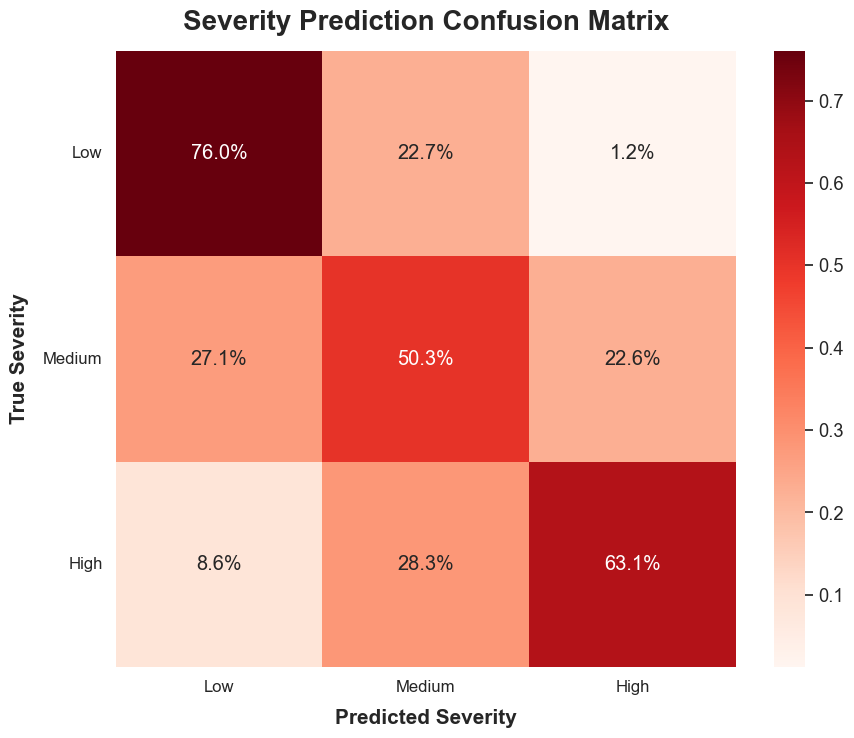

In [28]:
numClasses_ = 3
labels = ['Low', 'Medium', 'High']
label_map = {label: i for i, label in enumerate(labels)}

conf = np.zeros([numClasses_, numClasses_])

y_test_clean = y_test_s.reset_index(drop=True)
guesses = y_pred_s

for i in range(len(y_test_clean)):
    # Getting the string label (e.g., "High")
    real_str = y_test_clean.iloc[i]
    guess_str = guesses[i]

    # converting string to integer index using our map 
    real = label_map[real_str]
    guess = label_map[guess_str]
    conf[real, guess] += 1

# CALCULATE PERCENTAGES (Recall)
rowsums = np.sum(conf, 1, keepdims=True)
# Avoid division by zero if a class is empty
rowsums[rowsums == 0] = 1 
conf = conf / rowsums  

# plotting
df_cm = pd.DataFrame(conf, 
                     index=labels,
                     columns=labels)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2) 
sb.heatmap(df_cm, annot=True, cmap='Reds', fmt='.1%')

plt.title("Severity Prediction Confusion Matrix", fontsize=20, weight='bold', pad=15)
plt.xlabel("Predicted Severity", fontsize=15, weight='bold', labelpad=10)
plt.ylabel("True Severity", fontsize=15, weight='bold', labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

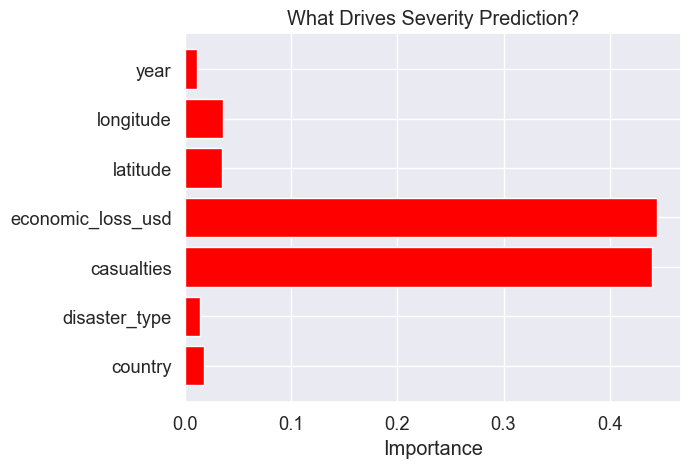

In [29]:
# importance from the trained Random Forest
importances = classifiers['Random Forest'].feature_importances_
feature_names = x_sev.columns

# simple visualization 
plt.barh(feature_names, importances, color='red')
plt.title("What Drives Severity Prediction?")
plt.xlabel("Importance")

plt.show()

- ***The Random Forest model achieved 63% accuracy when provided with immediate impact data (Casualties and Economic Loss). The model excels at identifying 'Low' and 'High' severity events (F1-scores of 0.72 and 0.67, respectively) but struggles to distinguish 'Medium' severity events (F1-score of 0.50). This indicates that while financial and human loss are strong indicators, the full 'Severity Index' depends on long-term factors like Recovery Days, which were excluded to simulate a rapid-response scenario.***

### Estimating Expected Recovery Duration

In [30]:
features_recovery = data[['severity_index',"aid_amount_usd", 'disaster_type', 'casualties', 'response_time_hours']].copy()
X_recov = features_recovery
y_recov = data['recovery_days'].copy()

lb_recov = LabelEncoder()
X_recov.loc[:, "disaster_type"] = lb_recov.fit_transform(X_recov["disaster_type"])

In [31]:
X_train_recov, X_test_recov, y_train_recov, y_test_recov = train_test_split(
    X_recov, y_recov, test_size=0.25, random_state=11)
print(X_train_recov.shape, X_test_recov.shape, y_train_recov.shape, y_test_recov.shape)

scaler_2 = StandardScaler()
X_train_recov_scaled = scaler_2.fit_transform(X_train_recov)
X_test_recov_scaled = scaler_2.transform(X_test_recov)

(37500, 5) (12500, 5) (37500,) (12500,)


In [32]:
lm_time = LinearRegression()
lm_time.fit(X_train_recov_scaled, y_train_recov)

LinearRegression()

In [33]:
# Predict on the TEST data
y_pred_recov = lm_time.predict(X_test_recov_scaled)
score = lm_time.score(X_test_recov_scaled, y_test_recov)
print("R² Score:", score)

R² Score: 0.9386885192057057


In [34]:
# Evaluate
r2 = r2_score(y_test_recov, y_pred_recov)
mae = mean_absolute_error(y_test_recov, y_pred_recov)
rmse = np.sqrt(mean_squared_error(y_test_recov, y_pred_recov))

print(f"Linear Regression - Predicting Recovery Day")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:,.2f} days")
print(f"RMSE: {rmse:,.2f} days")

Linear Regression - Predicting Recovery Day
R²: 0.939
MAE: 3.98 days
RMSE: 4.99 days


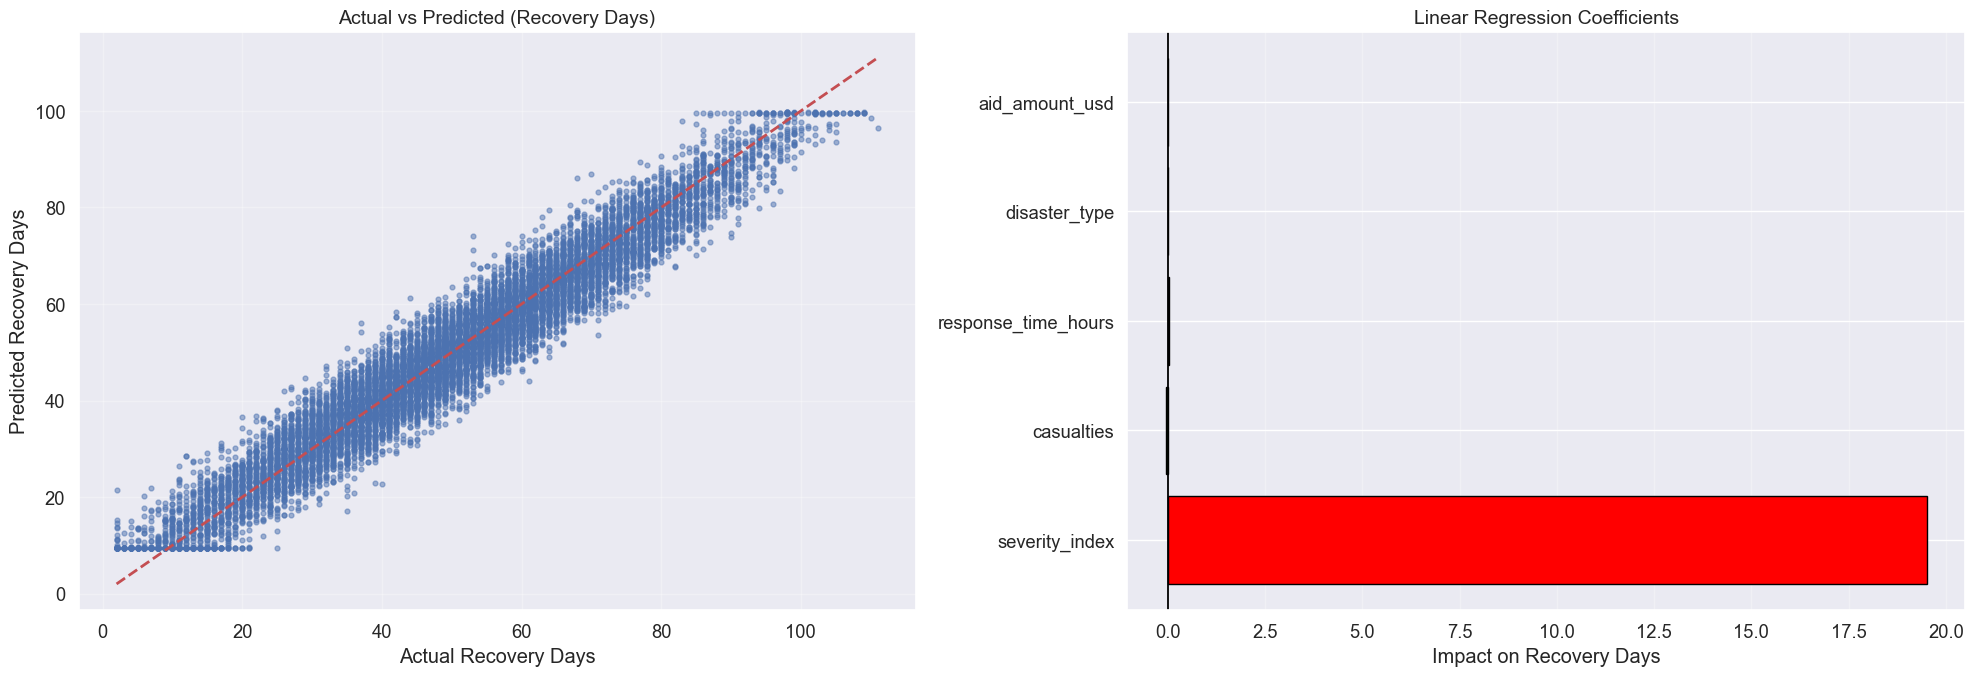


Coefficients:
 -> severity_index: 19.5045
 -> aid_amount_usd: -0.0062
 -> disaster_type: 0.0125
 -> casualties: -0.0593
 -> response_time_hours: 0.0179


In [36]:
# coefficients dataframe
coef_df = pd.DataFrame({
    'Feature': features_recovery.columns,
    'Coefficient': lm_time.coef_
})
coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False)

colors = ['red' if c > 0 else 'green' for c in coef_df['Coefficient']]

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
# Actual vs Predicted (Left subplot)
axes[0].scatter(y_test_recov, y_pred_recov, alpha=0.5, s=12)
axes[0].plot(
    [y_test_recov.min(), y_test_recov.max()],
    [y_test_recov.min(), y_test_recov.max()],
    'r--', lw=2
)

axes[0].set_xlabel("Actual Recovery Days")
axes[0].set_ylabel("Predicted Recovery Days")
axes[0].set_title("Actual vs Predicted (Recovery Days)", fontsize=14)
axes[0].grid(alpha=0.3)

# Coefficients (Right subplot) 
# We used a color map to show Positive (Red/Longer Recovery) vs Negative (Green/Faster Recovery)
axes[1].barh(coef_df['Feature'], coef_df['Coefficient'],
             color=colors, edgecolor='black')
axes[1].axvline(x=0, color='black', linewidth=1.3)

axes[1].set_xlabel("Impact on Recovery Days")
axes[1].set_title("Linear Regression Coefficients", fontsize=14)
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print coefficients
print("\nCoefficients:")
for feat, coef in zip(features_recovery.columns, lm_time.coef_):
    print(f" -> {feat}: {coef:.4f}")


- We hypothesize that the severity_index was originally calculated using recovery_days (e.g., $Severity \approx \frac{Recovery}{10}$), then the model hasn't "learned" to predict recovery. It has just discovered the mathematical formula used to create the data in the first place.

### Determinants of Economic Impact

In [37]:
features_econ = data[["disaster_type", 'severity_index', 'response_time_hours', 'country']].copy()

In [38]:
X_eco = features_econ
y_eco = data['economic_loss_usd'].copy()

lb_eco = LabelEncoder()
X_eco.loc[:, "disaster_type"] = lb_eco.fit_transform(X_eco["disaster_type"])
X_eco.loc[:, "country"] = lb_eco.fit_transform(X_eco["country"])

In [39]:
X_train_econ, X_test_econ, y_train_econ, y_test_econ = train_test_split(
    X_eco, y_eco, test_size=0.25, random_state=11)
print(X_train_econ.shape, X_test_econ.shape, y_train_econ.shape, y_test_econ.shape)

(37500, 4) (12500, 4) (37500,) (12500,)


In [40]:
lm_econ = LinearRegression()
lm_econ.fit(X_train_econ, y_train_econ)

LinearRegression()

In [41]:
# Predict on the TEST data
y_pred_econ = lm_econ.predict(X_test_econ)
score = lm_econ.score(X_test_econ, y_test_econ)

r2 = r2_score(y_test_econ, y_pred_econ)
mae = mean_absolute_error(y_test_econ, y_pred_econ)
rmse = np.sqrt(mean_squared_error(y_test_econ, y_pred_econ))

# Report
print("Economic Loss Regression Report")
print("-" * 30)
print(f"R² Score: {r2:.4f}")
print(f"MAE:  ${mae:,.2f}") 
print(f"RMSE: ${rmse:,.2f}")
print("-" * 30)

# Optional: Contextualize the error
avg_loss = np.mean(y_test_econ)
print(f"Average Actual Loss: ${avg_loss:,.2f}")
print(f"Error Percentage (MAE/Mean): {mae/avg_loss:.1%}")

Economic Loss Regression Report
------------------------------
R² Score: 0.3578
MAE:  $1,989,238.65
RMSE: $2,623,476.88
------------------------------
Average Actual Loss: $5,087,585.22
Error Percentage (MAE/Mean): 39.1%


The Linear Regression model achieved an $R^2$ of only 0.36, indicating that the current features capture roughly one-third of the variance in economic loss. The Mean Absolute Error (MAE) was approximately $2 million, representing a 39% error rate.

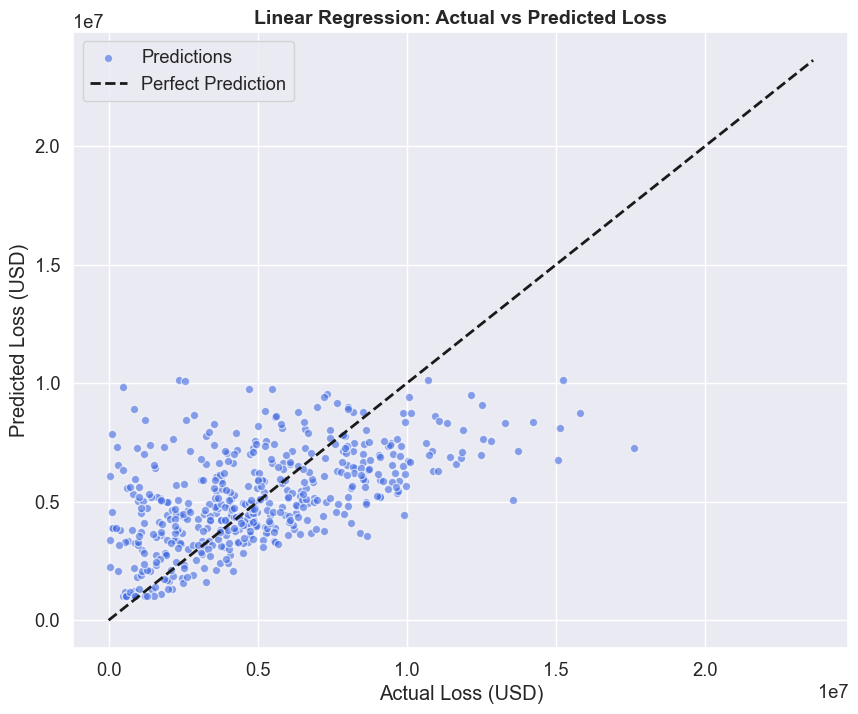

In [42]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test_econ[:500], y_pred_econ[:500], edgecolor = 'white', alpha=0.6, color='royalblue', label='Predictions')

plt.plot([y_test_econ.min(), y_test_econ.max()], [y_test_econ.min(), y_test_econ.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Loss (USD)')
plt.ylabel('Predicted Loss (USD)')
plt.title('Linear Regression: Actual vs Predicted Loss', fontsize=14, weight='bold')
plt.legend()
plt.grid(True)
plt.show()

- According to the graph, the model is effectively guessing the "average" loss. It is terrified of predicting huge numbers because it lacks the specific data to justify them.

This indicates that economic loss depends on hyper-local variables missing from the dataset, such as local infrastructure value, building codes, or population density at the exact impact site.

### Geospatial Clustering

In [43]:
X_km = data_3[['latitude', 'longitude', 'severity_index']] # finding the pattern based on these three

# scaling the data
scaler_3 = StandardScaler()
X_km_scaled = scaler_3.fit_transform(X_km)

# asking for 5 distinct groups
kmeans = KMeans(n_clusters=5, n_init=10, random_state=11)
data_2['cluster'] = kmeans.fit_predict(X_km_scaled)

Text(0.5, 1.0, 'Kmeans Visualization of Disaster Clusters')

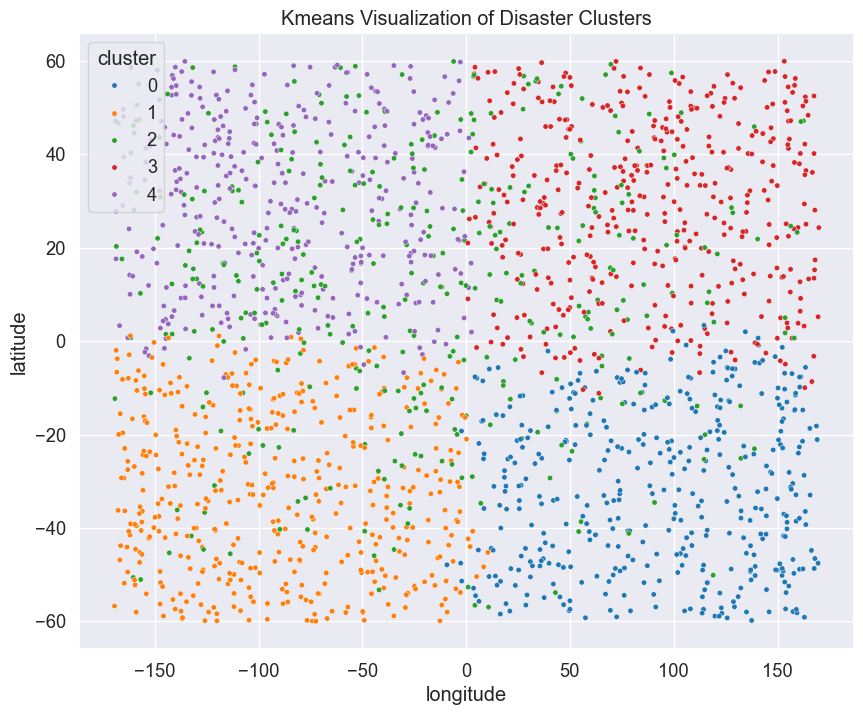

In [44]:
# K-Means Map
plt.figure(figsize=(10, 8))
sb.scatterplot(data=data_2.sample(2000), x='longitude', y='latitude', hue='cluster', palette='tab10', s=15)

plt.title('Kmeans Visualization of Disaster Clusters')

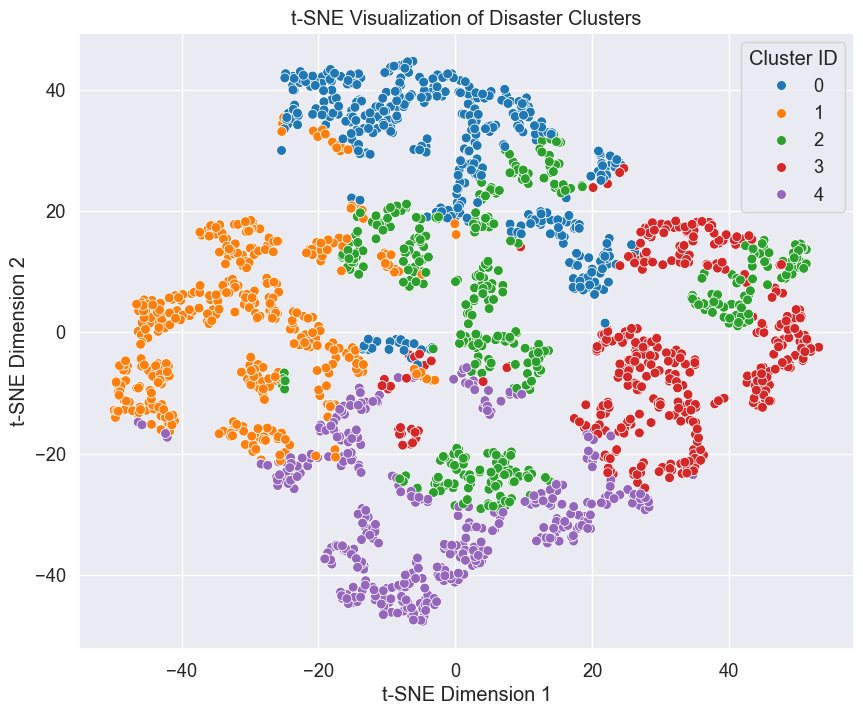

In [45]:
### getting a sample from our dataset
indices = np.random.choice(X_km_scaled.shape[0], 2000, replace=False)
X_subset = X_km_scaled[indices]
cluster_labels = data_2['cluster'].iloc[indices]

# Compressing the three dimensions into two using tsne
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(10, 8))
sb.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette='tab10', s=50, legend='full')

plt.title('t-SNE Visualization of Disaster Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster ID')
plt.show()

- The Distinct Islands (Blue, Orange, Purple, and Red), show that the model is very confident about these groups

In [46]:
columns_to_show = ['country', 'disaster_type', 'severity_index', 'latitude', 'longitude']

for c in sorted(data_2['cluster'].unique()):
    print(f"CLUSTER {c}")
    
    subset = data_2[data_2['cluster'] == c][columns_to_show]
    
    print("First 5 examples:")
    print(subset.head(5))
    
    print("\nLast 5 examples:")
    print(subset.tail(5))
    print(f"\n"+"="*30)

CLUSTER 0
First 5 examples:
        country disaster_type  severity_index  latitude  longitude
3     Indonesia  Extreme Heat            4.55   -33.547     30.350
17  Philippines      Wildfire            6.50   -43.244     83.296
18       Greece       Tornado            3.02    -8.588     28.401
21       Canada   Storm Surge            2.36   -13.828     32.602
38   Bangladesh     Hurricane            8.26   -44.123    148.075

Last 5 examples:
          country disaster_type  severity_index  latitude  longitude
49987      Brazil       Drought            7.04   -29.658     84.492
49988       Japan     Landslide            5.26    -2.471     18.344
49989     Germany     Hurricane            2.33   -35.056     23.162
49993  Bangladesh      Wildfire            4.62   -42.534      1.573
49994      Mexico   Storm Surge            5.50    -4.176    140.748

CLUSTER 1
First 5 examples:
         country disaster_type  severity_index  latitude  longitude
0         Brazil    Earthquake           

#### Through a closer look we can conclude that:
- Blue (Cluster 0): South-East (e.g., Australia, Southern Asia).
- Orange (Cluster 1): South-West (e.g., South America).
- Green (Cluster 2): High Severity Index Countries (5 < x)
- Red (Cluster 3): North-East (e.g., Europe, Northern Asia).
- Purple (Cluster 4): North-West (e.g., North America).

#### Comprehensive View of the Clusters

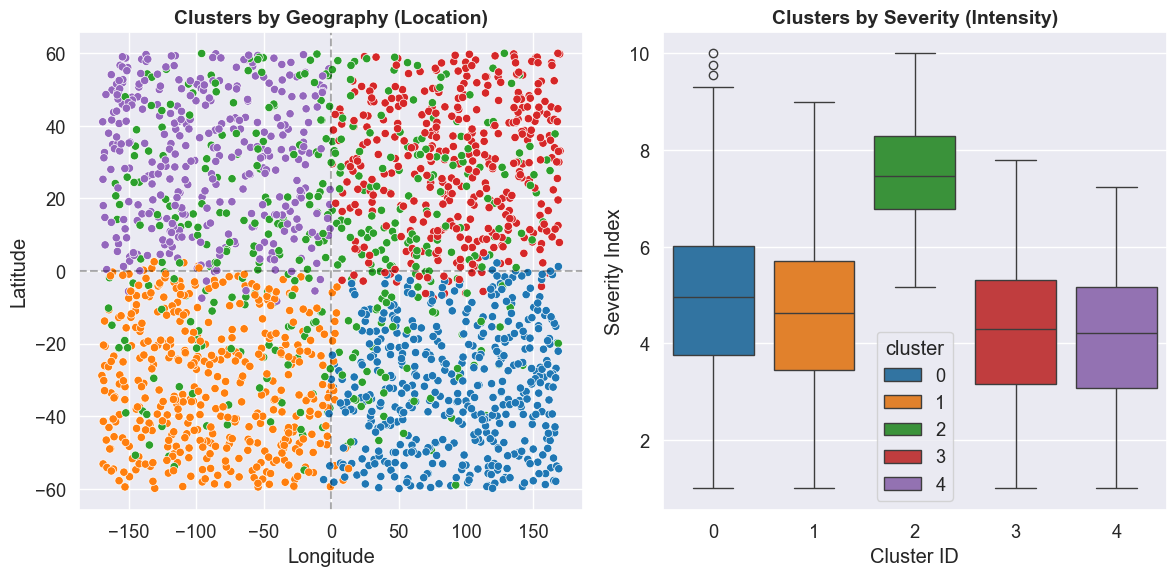

In [47]:
plt.figure(figsize=(12, 6))

# Plot 1: Geography (Lat vs Lon)
plt.subplot(1, 2, 1)
sb.scatterplot(data=data_2.sample(2000), x='longitude', y='latitude', hue='cluster', palette='tab10', legend=False)
plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.axvline(0, color='black', linestyle='--', alpha=0.3)
plt.title('Clusters by Geography (Location)', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot 2: Severity vs Latitude
plt.subplot(1, 2, 2)
sb.boxplot(data=data_2, x='cluster', y='severity_index', hue='cluster', palette='tab10')
plt.title('Clusters by Severity (Intensity)', fontsize=14, weight='bold')
plt.xlabel('Cluster ID')
plt.ylabel('Severity Index')

plt.tight_layout()
plt.show()

In [48]:
sample = data_2.sample(n=min(50, len(data_2)), random_state=11)  # limit for plotting speed
fig = px.scatter_geo(sample, lat='latitude', lon='longitude', color='disaster_type',
                     hover_name='country', size='severity_index',
                     title='Geographic Distribution of Sampled Natural Disaster Events')
fig.update_geos(projection_type="natural earth")
fig.show()

In [49]:
# Base map centered on the world
m = folium.Map(location=[0, 0], zoom_start=2)

colors = ['red', 'blue', 'green', 'purple', 'orange']
for idx, row in data_2.sample(500).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=colors[int(row['cluster'])],
        fill=True,
        popup=f"Severity: {row['severity_index']:.2f}\n Disaster: {row['disaster_type']}").add_to(m)
m

## Reflection

### Summary

| **Model / Analysis**                       | **Core Question**                              | **Key Result**                                   | **Insight**                                                                                           |
|--------------------------------------------|------------------------------------------------|--------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Recovery Time (Linear Regression)**      | How long will recovery take?                   | **R²: 0.939** (MAE ≈ 4 days)                     | Excellent predictability. Features such as severity and aid amount almost perfectly predict recovery.  |
| **Severity Classification (Random Forest and Decision Tree)**| Is this a High, Medium, or Low event?          | Accuracy: **63.1%** (High Severity Recall: 76%)  | Operationally useful. Model identifies High/Low well but struggles with the ambiguous Medium class.       |
| **Early Warning Efficiency (Random Forest)**| Will the response be highly efficient?        | Accuracy: **62.3%**                              | Challenging task. Efficiency depends partly on unobserved post-disaster factors.                      |
| **Risk Zoning (K-Means / t-SNE)**          | Where are the highest-risk areas?              | **5 Distinct Clusters**                          | Revealed a “Global Catastrophe” cluster. Severity, not geography, drove the most extreme grouping.    |
| **Economic Loss (Linear Regression)**      | How much will this cost?                       | **R²: 0.358** (MAE ≈ $2M)                        | Weak model: financial losses too noisy and influenced by missing variables (≈39% error rate).         |


### Things we could have done better

#### Data Quality and Feature Engineering
* We could have added more relevant predictors (e.g., GDP, infrastructure quality, population density, historical resilience index).
* Reduced noise by treating extreme outliers (economic loss spikes, missing severity codes).
* Encoded nonlinear relationships (log-transform economic loss, interaction features like **severity × casualties**).

#### Modeling Improvements
* Tried  gradient boosting methods (XGBoost) for more complex tasks like economic loss and efficiency prediction.
* Used class-weight adjustments (like SMOTE) to improve Medium-class recall in classification tasks.

#### Evaluation & Validation
* Applied cross-validation instead of single train/test splits to get more stable metrics.